In [227]:
from pandas import Series
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from pandas.tseries.offsets import BDay
import calendar
import math
import statistics as st
from scipy import stats

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import re
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

import datetime as dt
from datetime import datetime, date, timedelta

In [261]:
mu, sigma = 0, 1
s = [np.random.normal(mu, sigma, 20) for i in range(30)]

In [262]:
mn = []
md = []

for k in range(30):
    mn.append(np.mean(s[k]))
    md.append(np.median(s[k]))

In [263]:
mn

[0.10570757773301129,
 -0.2484024902677519,
 -0.25696265267892376,
 -0.176855848670881,
 0.15465639315417165,
 0.24739977125016197,
 -0.400176349487632,
 -0.06895901289035736,
 0.07324555575629997,
 0.006297307710727984,
 -0.08015592808324777,
 -0.28746231926332544,
 -0.16924115618207985,
 0.035284831862660515,
 -0.051625554875529646,
 0.3786937045292528,
 -0.12004365521551696,
 -0.21435042517334008,
 0.13578559951706431,
 0.21795290421392557,
 -0.2148898579388617,
 -0.10209438985868353,
 0.3251018560713234,
 -0.20519985311575323,
 -0.1820388821643802,
 -0.08679033551400277,
 -0.2990710461908353,
 0.07687219039213185,
 -0.11985731206766803,
 -0.14157383975734922]

In [264]:
var_1 = [np.var(s[i], ddof = 1)  for i in range(30)]


In [265]:
var_2 = [np.var(s[i])  for i in range(30)]


In [266]:
averagemn = np.mean(mn)
averagemn

-0.0556251072401796

In [267]:
averagemd = np.mean(md)
averagemd

-0.06093162407851394

In [268]:
averagevar1 = np.mean(var_1)
averagevar1

1.1019597727975363

In [269]:
averagevar2 = np.mean(var_2)
averagevar2

1.0468617841576593

In [219]:
var_m1 = np.var(mn,ddof =1)
print(var_m1, 1/20)

0.037063481509362776 0.05


In [221]:
var_m2 = np.var(md,ddof = 1)
print(var_m2, math.pi/(2*20))

0.06877351686733127 0.07853981633974483


In [229]:
alpha = 0.05                       # significance level = 5%
df = len(mn) - 1                  # degress of freedom = 20
t = stats.t.ppf(1 - alpha/2, df)   # t-critical value for 95% CI = 2.093
s = np.std(mn, ddof=1)            # sample standard deviation = 2.502
n = len(mn)

lower = averagemn - (t * s / np.sqrt(n))
upper = averagemn + (t * s / np.sqrt(n))
(lower, upper)

(-0.07571220609351641, 0.06806318335443966)

In [249]:
mu, sigma = 0, 1
meanconverge = []
medianconverge = []
varm1converge = []
varm2converge = []
samplesize = []
invert = []
meantest = []
mediantest = []
var1converge = []
var2converge = []
for j in range(50, 20000,50):
    mn = []
    md = []
    varm1 = []
    varm2 = []
    s = [np.random.normal(mu, sigma, j) for i in range(100)]
    mn = [np.mean(s[i])  for i in range(100)]
    md = [np.median(s[i])  for i in range(100)]
    var_1 = [np.var(s[i], ddof = 1)  for i in range(100)]
    var_2 = [np.var(s[i])  for i in range(100)]
    meanconverge.append(np.mean(mn))
    medianconverge.append(np.mean(md))
    varm1converge.append(np.var(mn, ddof = 1))
    varm2converge.append(np.var(md, ddof = 1))
    var1converge.append(np.mean(var_1))
    var2converge.append(np.mean(var_2))
    samplesize.append(j)
    invert.append(1/j)
    meantest.append(np.var(mn,ddof = 1)*j)
    mediantest.append(np.var(md, ddof = 1)*j)

<function matplotlib.pyplot.show(*args, **kw)>

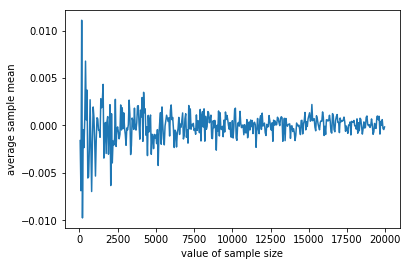

In [250]:
plt.plot(samplesize, meanconverge)
plt.ylabel('average sample mean')
plt.xlabel('value of sample size')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

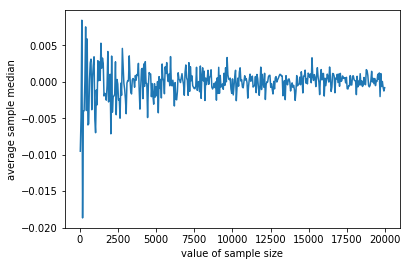

In [251]:
plt.plot(samplesize, medianconverge)
plt.ylabel('average sample median')
plt.xlabel('value of sample size')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

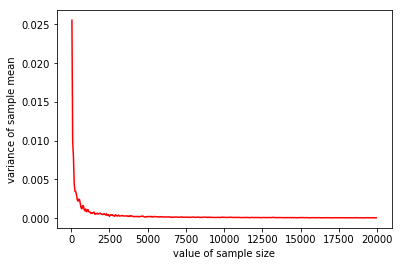

In [252]:
plt.plot(samplesize, varm1converge, 'r')
plt.ylabel('variance of sample mean')
plt.xlabel('value of sample size')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

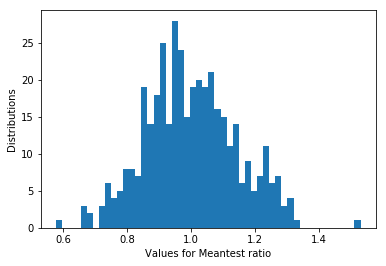

In [253]:
plt.hist(meantest,50)
plt.ylabel('Distributions')
plt.xlabel('Values for Meantest ratio')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

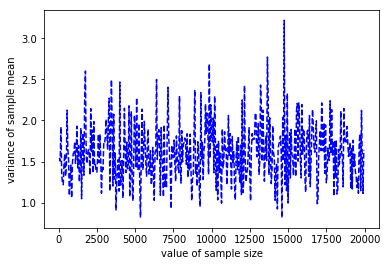

In [254]:
plt.plot(samplesize, test, 'b--')
plt.ylabel('variance of sample mean')
plt.xlabel('value of sample size')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

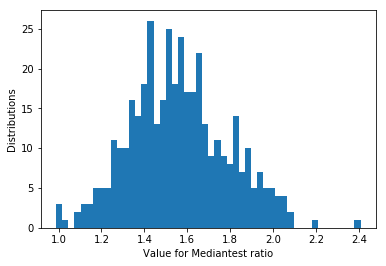

In [255]:
plt.hist(mediantest,50)
plt.ylabel('Distributions')
plt.xlabel('Value for Mediantest ratio')
plt.show

In [256]:
np.mean(meantest)

1.0006214205359745

In [257]:
math.pi/2

1.5707963267948966

In [258]:
np.mean(mediantest)

1.5629469727008258

In [236]:
np.mean(var_1)

0.9995312317206007

<function matplotlib.pyplot.show(*args, **kw)>

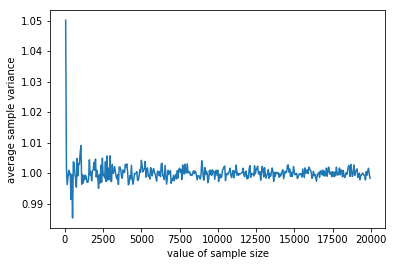

In [259]:
plt.plot(samplesize, var1converge)
plt.ylabel('average sample variance')
plt.xlabel('value of sample size')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

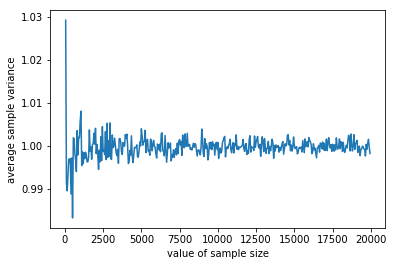

In [260]:
plt.plot(samplesize, var2converge)
plt.ylabel('average sample variance')
plt.xlabel('value of sample size')
plt.show

In [247]:
np.mean(var2converge)

0.9996400401713706

In [248]:
np.mean(var1converge)

0.9999704918937968